In [1]:
import sys
sys.path.append("../../../") # Where to find utilssphering
import utilssphering
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read CSV
match_rep_df = pd.read_csv("../../../checkpoints/match_rep_df.csv")
match_rep_df

,Vendor,Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Images_per_well,Sites-SubSampled,Binning,Magnification,Number_of_channels,...,Size_MB_std,sphering,value_95_replicating,Percent_Replicating,channel_names,brightfield_z_plane_used,feature_channels_found,Percent_Matching,value_95_matching,cell_count
0,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.000144,True,0.191908,60.000000,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.288099,2014937
1,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.000183,True,0.269617,62.222222,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.398249,2413350
2,MolDev,Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,NaN,1,10,6,...,0.000142,True,0.205121,66.666667,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.363114,2381443
3,MolDev,Scope1_MolDev_20X_4site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_20XPA_Crestz,Confocal,4,NaN,1,20,6,...,0.000114,True,0.182630,57.777778,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.279178,527841
4,MolDev,Scope1_MolDev_20X_9site,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_9site_20XPA,Widefield,9,NaN,1,20,6,...,0.000153,True,0.184205,67.777778,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.291127,1101611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch,JUMP-MOA_compound_platemap,BRO0117056_20x,Confocal,9,4.0,1,20,5,...,0.000044,True,0.153125,54.444444,"AGP, DNA, ER, Mito, RNA",NaN,"AGP, DNA, ER, Mito, RNA",20.930233,0.205267,544244
177,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch_12Z,JUMP-MOA_compound_platemap,BRO0117056_20xb,Confocal,9,4.0,1,20,5,...,0.000044,True,0.142486,61.111111,"AGP, DNA, ER, Mito, RNA",NaN,"AGP, DNA, ER, Mito, RNA",18.604651,0.209276,543826
178,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO0117059_20X,Confocal,9,4.0,1,20,6,...,0.000583,True,0.172448,56.666667,"AGP, BrightField, DNA, ER, Mito, RNA",Z08,"AGP, BrightField, DNA, ER, Mito, RNA",18.604651,0.232543,489099
179,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,4.0,1,20,6,...,0.000014,True,0.133543,56.666667,"AGP, BrightField, DNA, ER, Mito, RNA",Z17,"AGP, BrightField, DNA, ER, Mito, RNA",18.604651,0.192271,452567


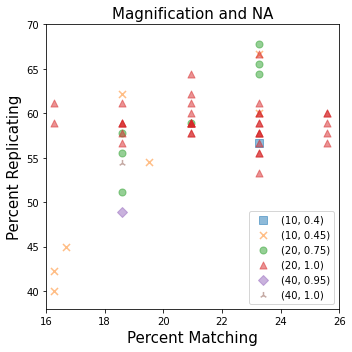

In [15]:
# 1

group = ["Magnification", "aperture"]

df_subset = match_rep_df[
    (match_rep_df["sphering"] == True) &
    (~match_rep_df["Batch"].str.contains("siteSub"))
                        ]

group_df = utilssphering.find_group_avg_df(df_subset, group)

fig, ax = plt.subplots(figsize=(5,5))

utilssphering.group_plot(
    df_subset, 
    "Percent_Matching", 
    "Percent_Replicating", 
    group=group, 
    fig=fig, 
    ax_=ax, 
    legend=True,
    alpha=0.5,
    use_markers=True,
    s=50,
    x_lim=[16,26],
    y_lim=[38,70],
    plot_title="Magnification and NA",
    xlabel="Percent Matching",
    ylabel="Percent Replicating"
    )

fig.savefig("(S1A)-rep-vs-match-mag_aperture.png", dpi=300)


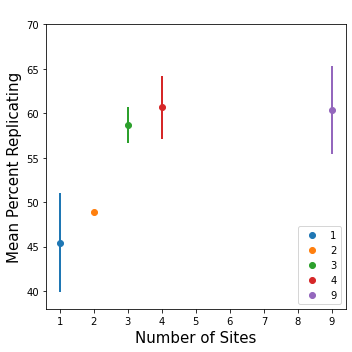

In [16]:
group = "sites"

df_subset = match_rep_df[
    (match_rep_df["sphering"] == True) &
    (~match_rep_df["Batch"].str.contains("siteSub"))
                        ]

group_df = utilssphering.find_group_avg_df(df_subset, group)

fig, ax = plt.subplots(figsize=(5,5))

# Plot the scatter
utilssphering.group_plot(
    df=group_df,
    x=group, 
    y="Mean_Percent_Replicating",
    group=group,
    fig=fig,
    ax_=ax,
    legend=True
)
# Plot the errorbars
utilssphering.group_plot(
    df=group_df, 
    x=group, 
    y="Mean_Percent_Replicating",
    group=group,
    error_y="SD_Percent_Replicating",
    fig=fig,
    ax_=ax,
    legend=True,
    legend_location="lower right",
    y_lim=[38,70],
    plot_title=" ",
    xlabel="Number of Sites",
    ylabel="Mean Percent Replicating"
)

fig.savefig("(S1B)-rep-vs-sites.png", dpi=300)

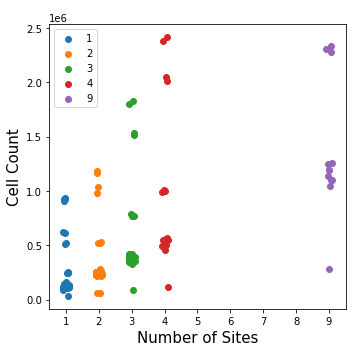

In [3]:
group = "sites"

df_subset = match_rep_df[
                        (match_rep_df["sphering"] == True)
                        ]

group_df = utilssphering.find_group_avg_df(df_subset, group)

fig, ax = plt.subplots(figsize=(5,5))

utilssphering.group_plot(
    df=df_subset,
    x=group, 
    y="cell_count",
    group=group,
    fig=fig,
    ax_=ax,
    legend=True,
    plot_title=" ",
    xlabel="Number of Sites",
    ylabel="Cell Count",
    jitter_x=0.1
)

fig.savefig("(S1C)-cell_count-vs-sites.png", dpi=300)

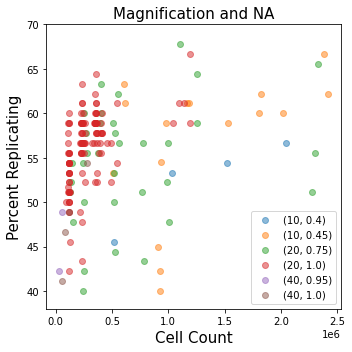

In [4]:
# 2

group = ["Magnification", "aperture"]

df_subset = match_rep_df[(match_rep_df["sphering"] == True)]

additional_cols = {
    "col1": ["cell_count", "Mean_Cell_Count", lambda x: np.mean(x)],
    "col2": ["cell_count", "SD_Cell_Count", lambda z: float('%.3f'%np.std(z))]
}
group_df = utilssphering.find_group_avg_df(df_subset, group, add_cols=additional_cols)

fig, ax = plt.subplots(figsize=(5,5))

utilssphering.group_plot(
    df_subset, 
    "cell_count", 
    "Percent_Replicating", 
    group=group, 
    fig=fig, 
    ax_=ax, 
    legend=True,
    alpha=0.5,
    y_lim=[38,70],
    plot_title="Magnification and NA",
    xlabel="Cell Count",
    ylabel="Percent Replicating"
    )


fig.savefig("(S1D)-rep-vs-cell_count-mag_aperture.png", dpi=300)

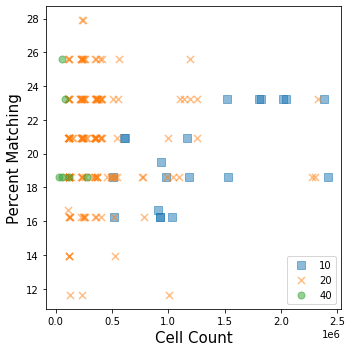

In [7]:
group = "Magnification"

df_subset = match_rep_df[(match_rep_df["sphering"] == True)]

additional_cols = {
    "col1": ["cell_count", "Mean_Cell_Count", lambda x: np.mean(x)],
    "col2": ["cell_count", "SD_Cell_Count", lambda z: float('%.3f'%np.std(z))]
}
group_df = utilssphering.find_group_avg_df(df_subset, group, add_cols=additional_cols)

fig, ax = plt.subplots(figsize=(5,5))

utilssphering.group_plot(
    df_subset, 
    x="cell_count", 
    y="Percent_Matching", 
    group=group, 
    fig=fig, 
    ax_=ax, 
    alpha=0.5,
    use_markers=True,
    s=50,
    legend=True,
    legend_location="lower right",
    xlabel="Cell Count",
    ylabel="Percent Matching"
    )


fig.savefig("(S1E)-match-vs-cell_count-mag.png", dpi=300)